# Projekt: Bild-Klassifikator für eigene Objekte

In [16]:
# Import Libraries
# import libraries
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image # Keras own inbuild image class
from tensorflow.keras.layers import Dense,Dropout,GlobalAveragePooling2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential,Input,Model

import numpy as np
import matplotlib.pyplot as plt

## Phase 1: Datensammlung

Es wurden Bilder der Klassen Bottle, Cup, Keyboard und Pen gesammelt.
Im ersten Schritt wurden die Bilder mithilfe des [Normalize Notebook](normalize.ipynb) normalisiert, um ihre Größe lokal zu reduzieren und sie anschließend effizient auf GitHub hochzuladen.

## Phase 2: Datenverarbeitung & Exploration

- Bottle
- Cup
- Keyboard
- Pen

### Load Single Image

In [17]:
img = image.load_img('Data/bottle/IMG_2647.jpg')
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [18]:
#convert image to array, can also specify datatype
img = image.img_to_array(img,dtype='uint8')

In [19]:
img.shape

(224, 224, 3)

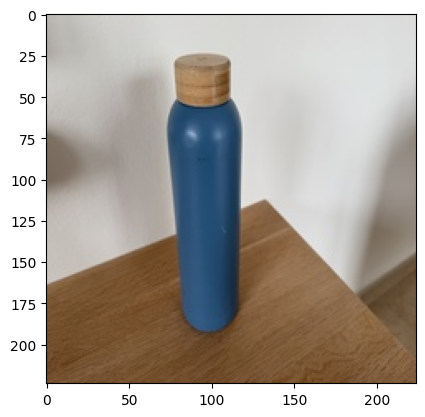

In [20]:
#plot image 
plt.imshow(img)

### Loading the entire images and labels

In [21]:
# Let's explore the data folder
import os
base_path = 'Data/'

# Let's define the classes
classes = os.listdir(base_path)

In [23]:
 for class_ in classes:
        print(class_)

all
bottle
cup
keyboard
pen


In [24]:
def load_image(base_path):
    """it loads all the image into X and the classes in y """
    X_list = []
    y_list = []
    classes = os.listdir(base_path)
    for class_ in classes:
        if class_!='.DS_Store':
        
            files = os.listdir(base_path+class_)
            for file in files:
                pic = image.load_img(path=base_path+class_+'/'+f'{file}',target_size=(224,224))
                numpy_image = np.array(pic)
                processed_image = preprocess_input(numpy_image)
                X_list.append(processed_image)
                y_list.append(class_)

    X = np.array(X_list)
    y = np.array(y_list)
    
    return X, y, classes

In [28]:
X, y, classes= load_image(base_path)

In [26]:
X.shape

(300, 224, 224, 3)

In [27]:
y

array(['bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle',
       'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle',
       'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle',
       'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle',
       'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle',
       'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle',
       'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle',
       'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle',
       'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle',
       'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle',
       'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle',
       'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle',
       'bottle', 'bottle', 'bottle', 'cup', 'cup', 'cup', 'cup', 'cup',
       'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup',
       'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup'

## Phase 3: Modelltraining mit Transfer Learning

## Phase 4: Evaluation

## Phase 5: Testing mit neuen Bildern